In [69]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load ToyotaCorolla dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [71]:
# Display first 5 rows
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


Exploratory Data Analysis (EDA)

In [72]:
# Dataset Shape
df.shape

(1436, 11)

In [73]:
# Data Types & Null Check
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   str  
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(10), str(1)
memory usage: 123.5 KB


In [74]:
#Statistical Snapshot
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [75]:
# Check missing values per column
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [76]:
# Count duplicate rows
df.duplicated().sum()

np.int64(1)

In [77]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [78]:
df.duplicated().sum()

np.int64(0)

Visualization

import matplotlib.pyplot as plt

import seaborn as sns

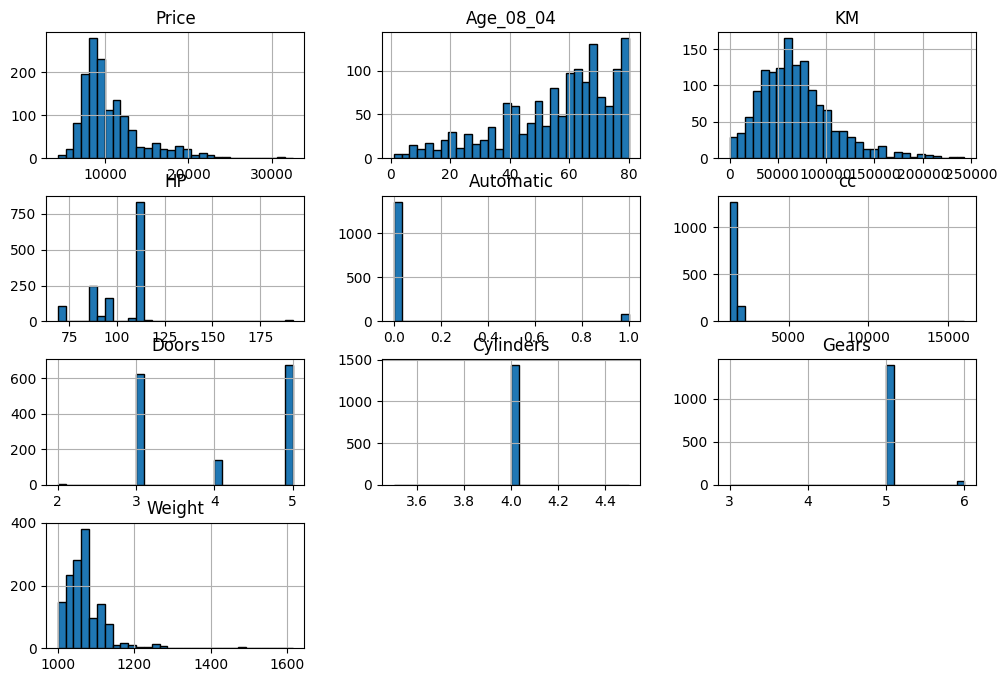

In [79]:
# Histogram plot for numerical columns
df.hist(bins=30, figsize=(12,8),edgecolor="black")
plt.show()


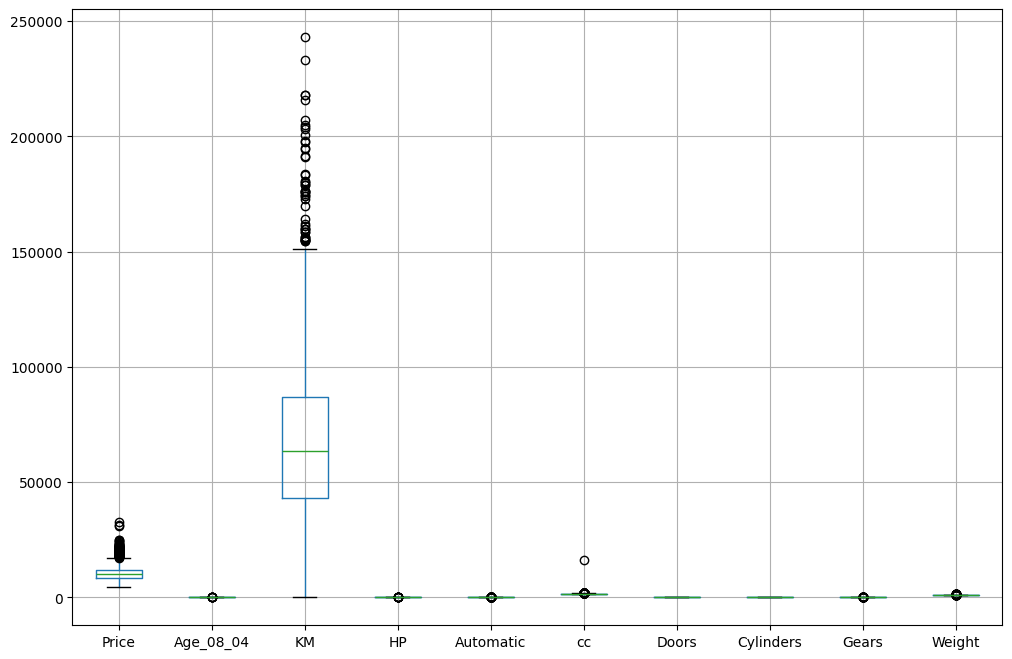

In [80]:
# outliers detected
df.boxplot(figsize=(12,8))
plt.show()

Outliers were identified during exploratory data analysis using boxplots, particularly in the Price variable. However, these values were not removed as they represent genuine high-end vehicle variants with valid characteristics such as lower age, higher horsepower, or premium fuel type. Removing them would reduce the model’s ability to generalize to real-world market conditions; therefore, all observed outliers were retained for analysis.

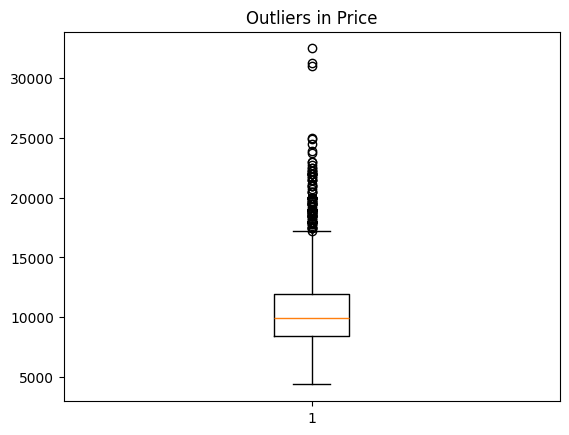

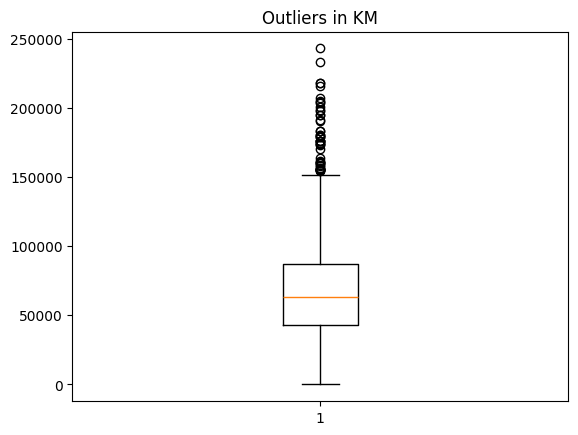

In [81]:
plt.boxplot(df["Price"])
plt.title("Outliers in Price")
plt.show()

plt.boxplot(df["KM"])
plt.title("Outliers in KM")
plt.show()


In [82]:
# Drop Automatic column
z = df.drop(columns=["Automatic", "Cylinders", "Gears"])
z

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
0,13500,23,46986,Diesel,90,2000,3,1165
1,13750,23,72937,Diesel,90,2000,3,1165
2,13950,24,41711,Diesel,90,2000,3,1165
3,14950,26,48000,Diesel,90,2000,3,1165
4,13750,30,38500,Diesel,90,2000,3,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1300,3,1025
1432,10845,72,19000,Petrol,86,1300,3,1015
1433,8500,71,17016,Petrol,86,1300,3,1015
1434,7250,70,16916,Petrol,86,1300,3,1015


In [86]:
z.shape, z.columns

((1435, 8),
 Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'cc', 'Doors', 'Weight'], dtype='str'))

In [83]:
df.shape, df.columns

((1435, 11),
 Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
        'Doors', 'Cylinders', 'Gears', 'Weight'],
       dtype='str'))

Reference MLR: https://www.geeksforgeeks.org/machine-learning/ml-multiple-linear-regression-using-python/

In [84]:
# Converting categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


After one-hot encoding, the categorical variables were converted from String to integer format to make the data compatible with linear regression models

In [89]:
correlation=z.corr(numeric_only=True)
correlation

,Price,Age_08_04,KM,HP,cc,Doors,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,0.301734
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,1.000000


Correlation tells us how strongly two variables are related.

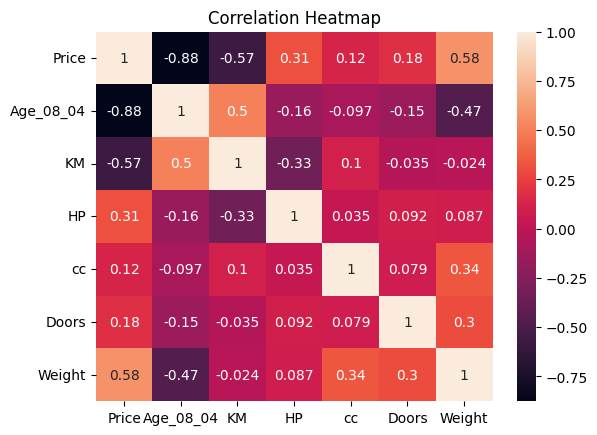

In [90]:
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Train , Test Data Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# Separate features (X) and target (y)
X = df.drop(columns=["Price"])
y = df["Price"]
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1435, dtype: int64

In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.77726827, -0.57595832, -2.34314893, ...,  0.        ,
        -0.14047507,  1.77496405],
       [-1.77726827,  0.11647404, -2.34314893, ...,  0.        ,
        -0.14047507,  1.77496405],
       [-1.72337979, -0.71670745, -2.34314893, ...,  0.        ,
        -0.14047507,  1.77496405],
       ...,
       [ 0.80937864, -1.37562683,  0.35325742, ...,  0.        ,
        -0.14047507, -1.09674669],
       [ 0.75549016, -1.37829506,  0.35325742, ...,  0.        ,
        -0.14047507, -1.09674669],
       [ 1.07882103, -1.82962616,  0.35325742, ...,  0.        ,
        -0.14047507,  0.7985824 ]], shape=(1435, 10))

In [96]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [97]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [98]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [100]:
model1=LinearRegression()
model1.fit(X_test,y_test)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [101]:
y_pred=model.predict(X_train)
y_pred

array([7520.1804043 , 8946.48956723, 7326.9741643 , ..., 7145.16450033,
       9855.22244498, 8235.52306314], shape=(1148,))

In [102]:
y_pred1=model1.predict(X_test)
y_pred1

array([11327.76904674, 10263.19907141,  9510.68527721,  9354.4688094 ,
        8745.10135691,  8556.08347264,  8555.81962392,  8182.56598404,
       12059.27464851, 12725.22061859,  9142.57395118,  9228.88062119,
       13261.8663578 , 12611.99172018,  8877.19545862, 11731.6390919 ,
       12524.06784949, 16820.99668318,  9234.72456905, 11810.31513621,
       12032.96642682, 18037.36402325,  9777.5886031 , 10671.9755428 ,
        7591.8277846 , 15816.57458929,  7348.11574045,  8538.50991403,
       15431.94570812, 13840.93358304,  8004.46842072, 11016.02680094,
       10071.30606708, 10070.36094411, 10054.72967204,  8437.42825612,
        8972.5771051 ,  9929.45688022, 16165.55908713, 10675.00590757,
        8917.77240308,  9472.25612453, 10763.77699592,  8395.25739906,
       10558.11305199, 17268.37683689, 10179.73536366,  8528.49392737,
       10947.62625086, 13103.4121464 , 13111.24785002,  6469.8230208 ,
       14623.80870291, 15865.32252418,  6092.99966075,  8348.50436589,
      

Build the model

Item	||     What itis     ||   	Role

MLR     ->    Model	        Predict continuous output

R² Score ->     Metric	    Evaluates MLR

Lasso	->      Model	        Regularized MLR

Ridge	 ->     Model	        Regularized MLR (L2)

Elastic Net	->  Model	        L1 + L2

In [110]:
from sklearn.metrics import r2_score #Evaluates MLR

In [111]:
score=r2_score(y_test,y_pred1)
score

0.8529818752768972

In [107]:
score1=r2_score(y_train, y_pred)
score1

0.8694838434310366

In [108]:
from sklearn.linear_model import Lasso, Ridge # Regularized MLR(lasso), Regularized MLR L2(Ridge)

In [114]:
lasso=Lasso(alpha=10)
lasso.fit(X_train, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [115]:
lasso_pred=lasso.predict(X_test)
lasso_pred

array([10710.07843616, 10348.19408703,  9324.6644189 ,  9379.53969092,
        8441.05641124,  8461.53731408,  7969.43145023,  8282.96963178,
       11765.96217516, 12374.8698334 ,  9481.53972513,  9344.77341091,
       13199.04321796, 12235.1046677 ,  8982.58224202, 11566.91843148,
       12326.8410664 , 17478.51940692, 10105.10604182, 11467.33254063,
       11523.59200011, 18059.51613388,  9834.14431448, 10399.25072457,
        7442.1396967 , 16000.32881981,  7133.41166193,  8350.35494068,
       15600.66371817, 13862.39065594,  8175.45887748, 10521.47293289,
       10128.03690487, 10132.70822281, 10032.12601219,  8652.96807707,
        8846.29560448,  9998.55739585, 16310.66425963, 10675.03158789,
        8784.94874937,  9537.72642528, 10114.94649377,  8536.2627364 ,
       10598.51506864, 17579.07679739, 10392.38293594,  9171.91925556,
       10715.49477745, 12549.03101794, 12868.89270522,  6291.52939617,
       14885.61769158, 16275.36812902,  6058.99878331,  7835.38832108,
      

In [116]:
lasso_score=r2_score(y_test, lasso_pred)
lasso_score

0.8347415423507912

In [118]:
lasso_pred1=lasso.predict(X_train)
lasso_pred1

array([7533.54285718, 8972.05585742, 7351.06062867, ..., 7166.04641802,
       9870.69852688, 8239.61949746], shape=(1148,))

In [119]:
lasso_score1=r2_score(y_train, lasso_pred1)
lasso_score1

0.869411024080535

In [120]:
lasso.intercept_

np.float64(10723.537823360559)

In [121]:
lasso.coef_

array([-2258.36606493,  -634.01615547,   291.19064141,   354.42572728,
          77.61832335,   -29.03927727,   -41.53435686,     0.        ,
          76.24512322,  1203.68295165])

==============================

In [128]:
params={'alpha':[10,20,30,40,50,100]}
#gridsearch cv is a techbique used for finding optimal parameters from a
#given set of parameters in a grid

In [129]:
grid_search=GridSearchCV(lasso,params)
# popular method to find best penalizing factor

===============================

In [130]:
#Ridge technique
ridge=Ridge(alpha=10)

In [131]:
grid_search.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Lasso(alpha=10)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': [10, 20, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter indexes ar

In [132]:
grid_search.best_params_

{'alpha': 50}

In [133]:
ridge.fit(X_train,y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [134]:
ridge_pred=ridge.predict(X_test)
ridge_pred

array([10764.48420308, 10346.40694889,  9303.36008632,  9402.9466982 ,
        8450.75725069,  8457.72503267,  7970.37529223,  8310.28783953,
       11752.15808192, 12361.31962594,  9484.48110572,  9365.08216938,
       13179.42634448, 12227.81734211,  8997.37776248, 11555.69528611,
       12309.76519386, 17458.54930361, 10037.42442122, 11465.78890642,
       11491.78734937, 18033.01868628,  9844.36005349, 10402.01401552,
        7429.27833393, 15987.76241549,  7135.40526085,  8338.88386785,
       15586.50204613, 13852.34659481,  8193.07934136, 10504.00676064,
       10123.07214544, 10139.22957263, 10053.65885952,  8654.98065812,
        8840.94623183, 10005.95006006, 16289.95640229, 10683.61669153,
        8760.77699446,  9552.39166353, 10182.96361867,  8553.42550174,
       10600.20509086, 17555.98152624, 10447.90123578,  9252.76886831,
       10704.53855199, 12519.30980661, 12851.14203442,  6312.39323533,
       14866.99300863, 16289.57987605,  6060.22391915,  7811.70396217,
      

In [135]:
ridge_score=r2_score(y_test, ridge_pred)
ridge_score

0.833700279716382